This notebook explores the qudit implementation in `d_spiders.py` and provides some evidence for the conjecture $$\tilde{S}_n^d \simeq \mathbb{C}^{d-1}[x_1, ..., x_n]/(x_1^d, ..., x_n^d)$$

Where $\tilde{S}_n^d$ is the ring of $n$-paritite controlled qudit states. The specific case of $d = 3$ will be explored, though could easily be modified.

In [1]:
import d_spiders
import numpy as np

d = 3
d_spiders.set_d(d)

from d_spiders import ZBox, W, X, Z, Id
from pyfile import eval
eval(ZBox(1, 1))

set d to 3


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

The main difference with qudit arithmetic is that phases are now tuples $\vec{a} \in \mathbb{C}^{d-1}$. In the code implementation, phases are passed in as tuples of $d$ elements but the first element is required to be $1$.

In [2]:
#eval(ZBox(1,1,[2, 2, 3]))

In [3]:
eval(ZBox(1,1,[1, 2, 3]))

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

### Scalar arithmetic

Firstly, I verify that the W adds numbers componentwise and the Z multiples them. 

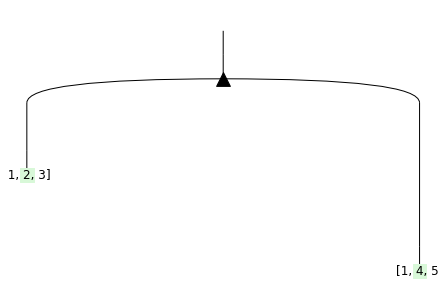

array([[1., 6., 8.]])

In [4]:
a1 = [1, 2, 3]
a2 = [1, 4, 5]

add = W(1, 2) >> ZBox(1, 0, a1) @ ZBox(1, 0, a2)
add.draw()
eval(add)

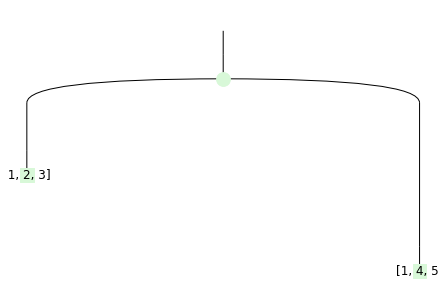

array([[ 1.+0.j,  8.+0.j, 15.+0.j]])

In [5]:
times = Z(1, 2) >> ZBox(1, 0, a1) @ ZBox(1, 0, a2)
times.draw()
eval(times)

### Polynomial arithmetic

Now I verify that W adds polynomials and Z multiplies them.

I shall check $p_1 = [1, 2, 3] + [1, 4, 5]x + [1, 6, 7]x^2, p_2 = [1, 8, 9] + [1, 10, 11]x + [1, 12, 13]x^2$

These look like:

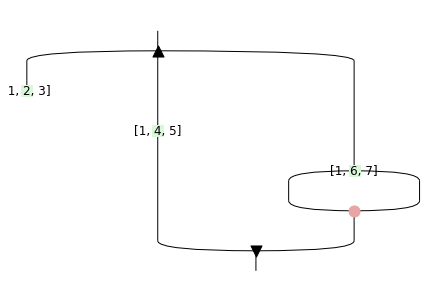

array([[1.0001+0.j, 2.0002+0.j, 3.0003+0.j],
       [0.    +0.j, 4.0003+0.j, 7.0006+0.j],
       [0.    +0.j, 6.0005+0.j, 5.0004+0.j]])

In [6]:
p1 = W(1, 3) >> ZBox(1, 0, [1, 2, 3]) @ ZBox(1, 1, [1, 4, 5]) @ ZBox(1, 2, [1, 6, 7]) >> Id(1) @ X(2,1) >> W(2, 1, True) 
p1.draw()
eval(p1)

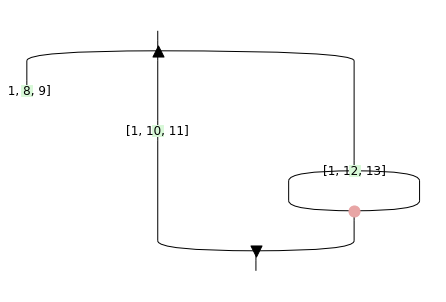

array([[ 1.0001+0.j,  8.0007+0.j,  9.0008+0.j],
       [ 0.    +0.j, 10.0009+0.j, 13.0011+0.j],
       [ 0.    +0.j, 12.001 +0.j, 11.0009+0.j]])

In [7]:
p2 = W(1, 3) >> ZBox(1, 0, [1, 8, 9]) @ ZBox(1, 1, [1, 10, 11]) @ ZBox(1, 2, [1, 12, 13]) >> Id(1) @ X(2,1) >> W(2, 1, True) 
p2.draw()
eval(p2)

Note that the third column permutes the order of the $x^2$ coefficients

In [8]:
from polys import Poly, symbols
x = symbols('x')
p1a = 2 + 4*x + 6*x**2
p2a = 8 + 10*x + 12*x**2
p1b = 3 + 5*x + 7*x**2
p2b = 9 + 11*x + 13*x**2
Poly(p1a + p2a)

Poly(18*x**2 + 14*x + 10, x, domain='ZZ')

In [9]:
Poly(p1b + p2b)

Poly(20*x**2 + 16*x + 12, x, domain='ZZ')

In [10]:
Poly(p1a * p2a)

Poly(72*x**4 + 108*x**3 + 112*x**2 + 52*x + 16, x, domain='ZZ')

In [11]:
Poly(p1b*p2b)

Poly(91*x**4 + 142*x**3 + 157*x**2 + 78*x + 27, x, domain='ZZ')

Thus the expected addition/multiplication outcomes are $$p_1 + p_2 = [1,10,12] + [1, 14, 16]x + [1, 18, 20]x^2$$

$$ p_1 \times p_2 = [1, 16, 27] + ([1, 20, 33] + [1, 32, 45])x + ([1,24,39] + [1, 40, 55] + [1,48, 63])x^2  = [1, 16, 27] + [1, 52, 78]x + [1, 112, 157]x^2$$

In [12]:
p_add_expected = W(1, 3) >> ZBox(1, 0, [1, 10, 12]) @ ZBox(1, 1, [1, 14, 16]) @ ZBox(1, 2, [1, 18, 20]) >> Id(1) @ X(2,1) >> W(2, 1, True) 
eval(p_add_expected)

array([[ 1.0001+0.j, 10.0009+0.j, 12.001 +0.j],
       [ 0.    +0.j, 14.0012+0.j, 20.0017+0.j],
       [ 0.    +0.j, 18.0016+0.j, 16.0014+0.j]])

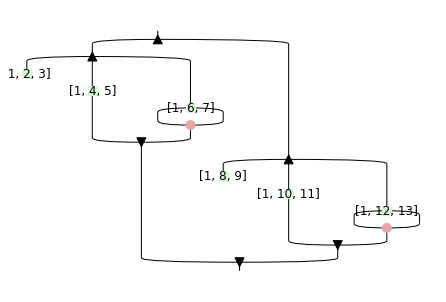

array([[ 1.0002+0.j, 10.0017+0.j, 12.0021+0.j],
       [ 0.    +0.j, 14.0024+0.j, 20.0034+0.j],
       [ 0.    +0.j, 18.0031+0.j, 16.0028+0.j]])

In [13]:
p_add = W(1, 2) >> p1 @ p2 >> W(2, 1, True)
p_add.draw()
eval(p_add)

In [14]:
p_times_expected = W(1, 3) >> ZBox(1, 0, [1, 16, 27]) @ ZBox(1, 1, [1, 52, 78]) @ ZBox(1, 2, [1, 112, 157]) >> Id(1) @ X(2,1) >> W(2, 1, True) 
eval(p_times_expected)

array([[  1.0001+0.j,  16.0014+0.j,  27.0023+0.j],
       [  0.    +0.j,  52.0045+0.j, 157.0135+0.j],
       [  0.    +0.j, 112.0096+0.j,  78.0067+0.j]])

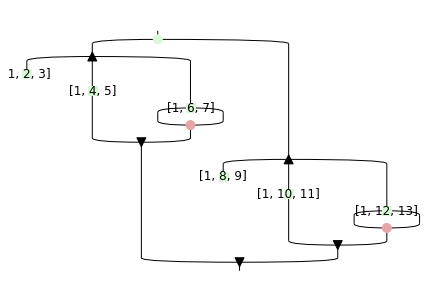

array([[  1.0002+0.j,  16.0028+0.j,  27.0047+0.j],
       [  0.    +0.j,  52.009 +0.j, 102.0176+0.j],
       [  0.    +0.j,  72.0124+0.j,  78.0134+0.j]])

In [15]:
p_times = Z(1, 2) >> p1 @ p2 >> W(2, 1, True)
p_times.draw()
eval(p_times)

In [16]:
p_times_actual = W(1, 3) >> ZBox(1, 0, [1, 16, 27]) @ ZBox(1, 1, [1, 52, 78]) @ ZBox(1, 2, [1, 72, 102]) >> X(3, 1)
eval(p_times_actual)

array([[  1.0002+0.j,  16.0032+0.j,  27.0054+0.j],
       [  0.    +0.j,  52.0104+0.j, 102.0204+0.j],
       [  0.    +0.j,  72.0144+0.j,  78.0156+0.j]])

Addition seems to work, while multiplication fails. The problem is as follows.

Let $p_1 = \vec{a} + \vec{b}x + \vec{c}x^2, p_2 = \vec{d} + \vec{e}x + \vec{f}x^2$

As expected, the $x$ coefficient of $p_1 \times p_2$ seems to be $\vec{a e} + \vec{ b d}$

I assumed that the $x^2$ coefficient of $p_1 \times p_2$ would be $\vec{a f} + \vec{b e} + \vec{c d}$. Instead, it turned out to be $\vec{a f} + \vec{c d}$

Since X and W spiders have come apart for qudits, there were a number of decisions that were conventions chosen here that could have gone differently. The following enumerates all possible choices of X or W spider and shows that about half compute the addition as expection, and none compute the multiplication as expected.

In [20]:
for mid1 in [W(2, 1, True), X(2, 1)]:
    for mid2 in [W(2, 1, True), X(2, 1)]:
        p1 = W(1, 3) >> ZBox(1, 0, [1, 2, 3]) @ ZBox(1, 1, [1, 4, 5]) @ ZBox(1, 2, [1, 6, 7]) >> Id(1) @ mid1 >> mid2
        p2 = W(1, 3) >> ZBox(1, 0, [1, 8, 9]) @ ZBox(1, 1, [1, 10, 11]) @ ZBox(1, 2, [1, 12, 13]) >> Id(1) @ mid1 >> mid2
        for bottom in [W(2, 1, True), X(2, 1)]:
            ptimes = Z(1, 2) >> p1 @ p2 >> bottom
            out = eval(ptimes).astype(int)
            add = W(1, 2) >> p1 @ p2 >> bottom
            print("\n\n", mid1, mid2, bottom, "\n", eval(add).astype(int), "\n", out)
    

<ipython-input-20-6aa941c4a00c>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  out = eval(ptimes).astype(int)




 W(2, 1) W(2, 1) W(2, 1) 
 [[ 1 10 12]
 [ 0 14  0]
 [ 0  0 16]] 
 [[ 1 16 27]
 [ 0 52  0]
 [ 0  0 78]]


<ipython-input-20-6aa941c4a00c>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  print("\n\n", mid1, mid2, bottom, "\n", eval(add).astype(int), "\n", out)




 W(2, 1) W(2, 1) X(2, 1) 
 [[ 1 10 12]
 [ 0 14  0]
 [ 0  0 16]] 
 [[ 1 16 27]
 [ 0 52 55]
 [ 0 40 78]]


 W(2, 1) X(2, 1) W(2, 1) 
 [[ 1 10 12]
 [ 0 14  0]
 [ 0  0 16]] 
 [[ 1 16 27]
 [ 0 52  0]
 [ 0  0 78]]


 W(2, 1) X(2, 1) X(2, 1) 
 [[ 1 10 12]
 [ 0 14  0]
 [ 0  0 16]] 
 [[ 1 16 27]
 [ 0 52 55]
 [ 0 40 78]]


 X(2, 1) W(2, 1) W(2, 1) 
 [[ 1 10 12]
 [ 0 14 20]
 [ 0 18 16]] 
 [[  1  16  27]
 [  0  52 102]
 [  0  72  78]]


 X(2, 1) W(2, 1) X(2, 1) 
 [[ 1 10 12]
 [ 0 14 20]
 [ 0 18 16]] 
 [[  1 124 169]
 [  0 124 157]
 [  0 112 169]]


 X(2, 1) X(2, 1) W(2, 1) 
 [[ 1 10 12]
 [ 0 14 20]
 [ 0 18 16]] 
 [[  1  16  27]
 [  0  52 102]
 [  0  72  78]]


 X(2, 1) X(2, 1) X(2, 1) 
 [[ 1 10 12]
 [ 0 14 20]
 [ 0 18 16]] 
 [[  1 124 169]
 [  0 124 157]
 [  0 112 169]]
